<a href="https://colab.research.google.com/github/Marconiadsf/TechChallenger_2_Ibovespa/blob/main/FeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ta

In [ ]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ta
import warnings

warnings.filterwarnings("ignore")

In [ ]:
# Carregar os dados
df = pd.read_csv("Dados_Historicos_Ibovespa.csv", sep=",")
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,31.10.2025,149.540,148.774,149.636,148.774,"8,91B","0,51%"
1,30.10.2025,148.780,148.632,149.234,147.546,"7,30B","0,10%"
2,29.10.2025,148.633,147.430,149.067,147.430,"8,00B","0,82%"
3,28.10.2025,147.429,146.970,147.811,146.575,"7,11B","0,31%"
4,27.10.2025,146.969,146.174,147.977,146.174,"6,45B","0,55%"


In [ ]:
df.shape

(752, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      752 non-null    object 
 1   Último    752 non-null    float64
 2   Abertura  752 non-null    float64
 3   Máxima    752 non-null    float64
 4   Mínima    752 non-null    float64
 5   Vol.      752 non-null    object 
 6   Var%      752 non-null    object 
dtypes: float64(4), object(3)
memory usage: 41.3+ KB


Base de dados 7 (?) features.

- Nescessário o tratamento de: Data, Vol., Var%
- Analisar amplitude das variáveis.  

In [ ]:
#Converter valores em Vol.

df.dtypes

def convert_volume(volume_str):
    if isinstance(volume_str, str):
        volume_str = volume_str.replace(',', '.').strip()
        if 'B' in volume_str:
            return float(volume_str.replace('B', '')) * 1_000_000_000
        elif 'M' in volume_str:
            return float(volume_str.replace('M', '')) * 1_000_000
        elif 'K' in volume_str:
            return float(volume_str.replace('K', '')) * 1_000
        else:
            return float(volume_str)
    return volume_str

df['Vol.'] = df['Vol.'].apply(convert_volume)
df['Vol.'] = pd.to_numeric(df['Vol.'], errors='coerce')

In [ ]:
# Converter valores em Var%
df['Var%'] = df['Var%'].str.replace('%', '', regex=False)
df['Var%'] = df['Var%'].str.replace(',', '.', regex=False)
df['Var%'] = pd.to_numeric(df['Var%'], errors='coerce')
df['Var%'] = df['Var%'] / 100

In [ ]:
#Tratamento das informações de Data
df["Data"] = pd.to_datetime(df["Data"],format="%d.%m.%Y")
df = df.sort_values(by="Data", ascending=True)



Com os tratamentos básicos vamos verificar o comportamento do valor da Bovespa no intervalo analisado.

###Qual o intervalo dos dados?

In [ ]:
print(df['Data'].min())
print(df['Data'].max())

2022-10-31 00:00:00
2025-10-31 00:00:00


## Vamos plotar um gráfico de linha e ver como os dados se comportam no tempo.

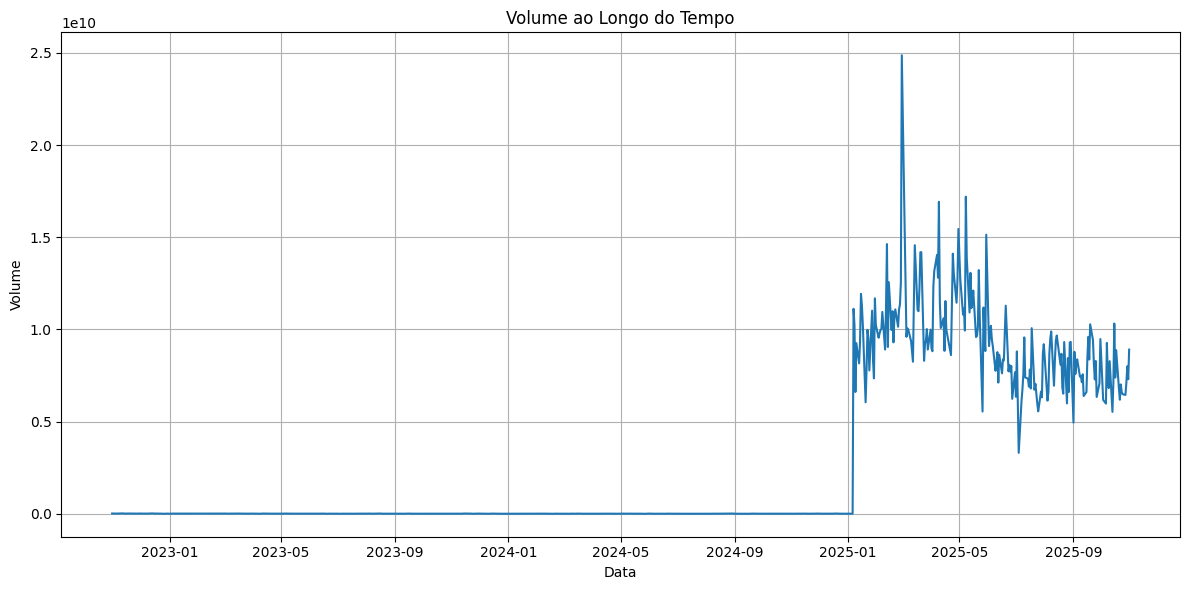

In [ ]:
# Criar o gráfico de linha
plt.figure(figsize=(12, 6))
plt.plot(df['Data'], df['Vol.'])
plt.title('Volume ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Volume')
plt.grid(True)
plt.tight_layout()
plt.show()

Algo de errado na base? O que aconteceu para esta diferença?

In [ ]:
df['Vol.'].tail()

,Vol.
4,6.450000e+09
3,7.110000e+09
2,8.000000e+09
1,7.300000e+09
0,8.910000e+09


In [ ]:
df['Vol.'].head()

,Vol.
751,21640000.0
750,17970000.0
749,15630000.0
748,16210000.0
747,15220000.0


In [ ]:
print(df['Vol.'].min())
print(df['Vol.'].max())

4330000.0
24870000000.0


Hum... parece que pode ser realmente um salto no valor de negiciação em 2025 gerando uma diferença de escala. Vamos analisar essa coluna em especifico...


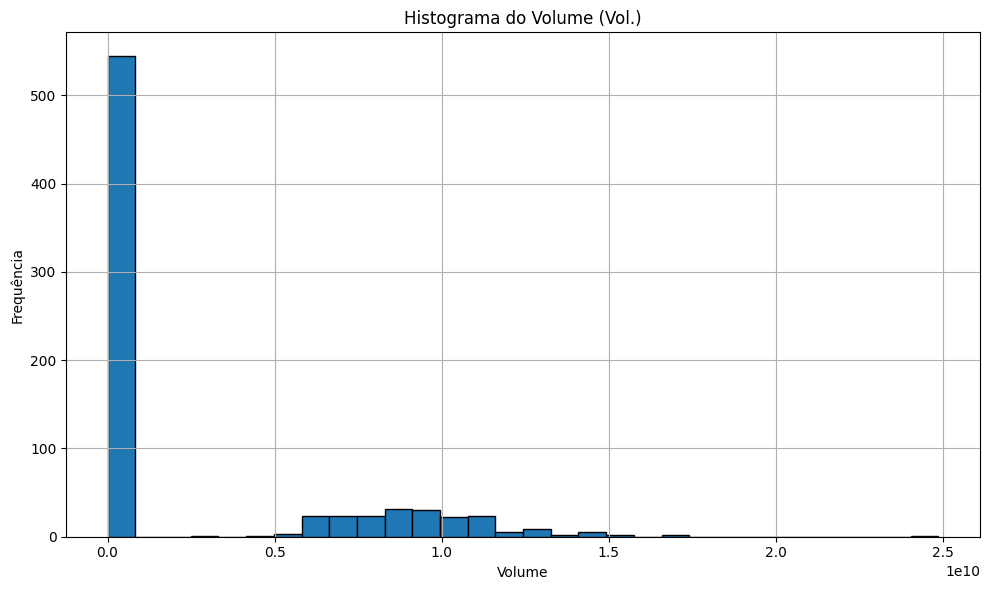

In [ ]:
# Gerar um histograma para a coluna 'Vol.'

plt.figure(figsize=(10, 6))
plt.hist(df['Vol.'], bins=30, edgecolor='black') # bins define o número de barras
plt.title('Histograma do Volume (Vol.)')
plt.xlabel('Volume')
plt.ylabel('Frequência')
plt.grid(True)
plt.tight_layout()
plt.show()

Dificil até de ver essa  freq. de distribuição, realmente os dados não parecem nada homogêneos. Tentando aplicar a raiz quadrada sobre os dados e plotar....

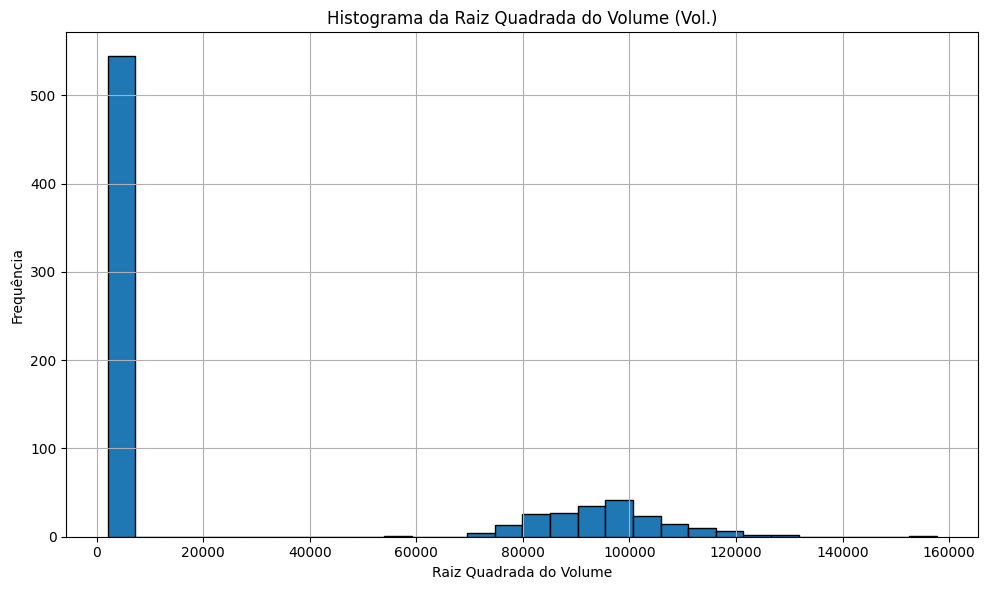

In [ ]:



# Aplicar a raiz quadrada na coluna 'Vol.'
df['Vol._sqrt'] = np.sqrt(df['Vol.'])

# Gerar um histograma para a coluna transformada 'Vol._sqrt'
plt.figure(figsize=(10, 6))
plt.hist(df['Vol._sqrt'], bins=30, edgecolor='black') # bins define o número de barras
plt.title('Histograma da Raiz Quadrada do Volume (Vol.)')
plt.xlabel('Raiz Quadrada do Volume')
plt.ylabel('Frequência')
plt.grid(True)
plt.tight_layout()
plt.show()

Hum..continua complicado... olhando o boxplot...

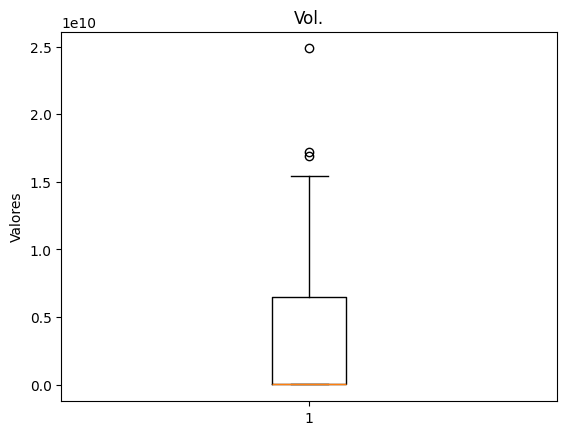

In [ ]:
# Criar o gráfico de boxplot
plt.boxplot(df['Vol.'])
plt.title('Vol.')
plt.ylabel('Valores')
plt.show()

Investigar o por que da diferença entre 2024 e 2025 nos volumes negociados.
Olhar o boxplot das outras variáveis

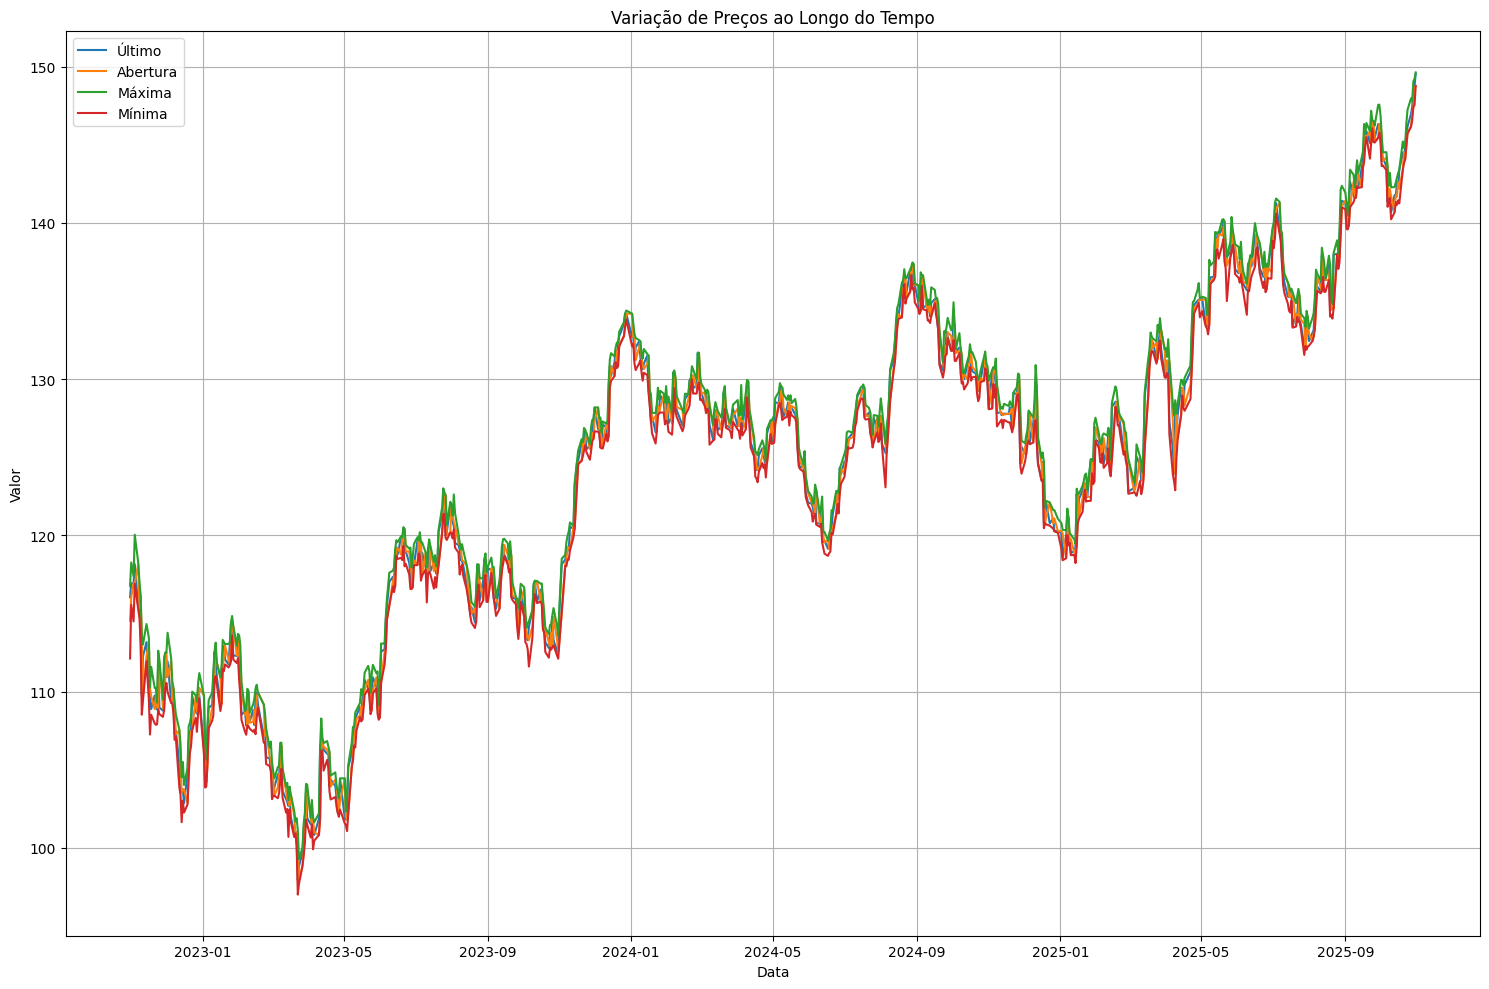

In [ ]:
columns_to_plot = ['Último', 'Abertura', 'Máxima', 'Mínima']

plt.figure(figsize=(15, 10))

for column in columns_to_plot:
    plt.plot(df['Data'], df[column], label=column)

plt.title('Variação de Preços ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Interpretação:

As variáveis/colunas/features Último, Abertura, Mínimo e Máximo andam próximas. Vou interpretar o seguinte:
1. Último é o fechamento do dia. Pode assumir qualquer valor entre [Mínimo,Máximo]
2. Mínimo e Máximo são respectivamente o menor e maior valor atingidos em um dia.
3. Sendo assim Máximo - Mínimo é a máxima variação/oscliação intraday, já Último - Abertura a variação efetiva do dia e o que gera a Var% e logo se o dia fechou em baixa (Último-Abertura <0) ou alta (Último-Abertura > 0)


Agora olhando o boxplot dessas features:

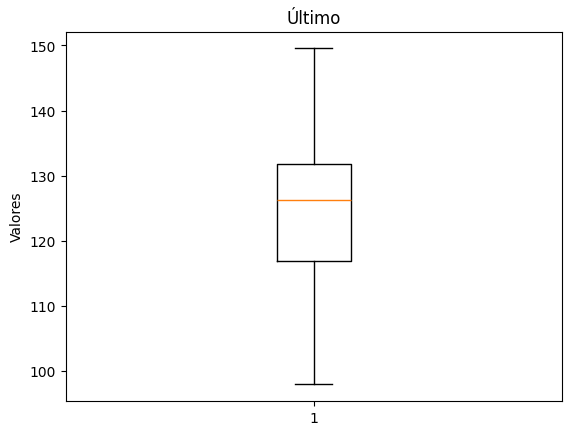

In [ ]:
# Criar o gráfico de boxplot
plt.boxplot(df['Último'])
plt.title('Último')
plt.ylabel('Valores')
plt.show()

In [ ]:
print(df['Último'].min())
print(df['Último'].max())

97.926
149.54


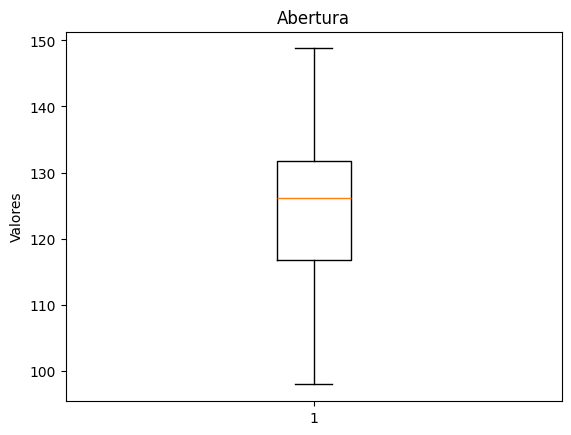

In [ ]:
# Criar o gráfico de boxplot
plt.boxplot(df['Abertura'])
plt.title('Abertura')
plt.ylabel('Valores')
plt.show()

In [ ]:
print(df['Abertura'].min())
print(df['Abertura'].max())

97.926
148.774


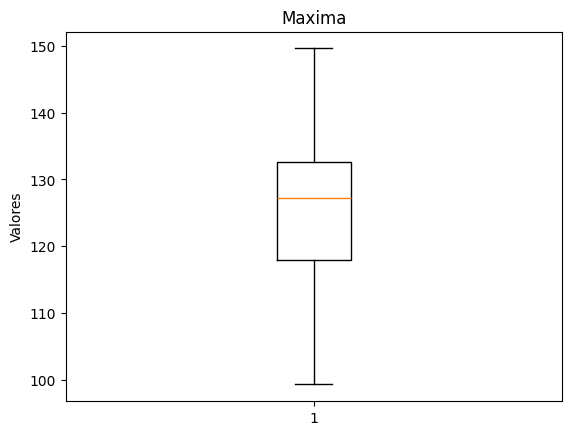

In [ ]:
# Criar o gráfico de boxplot
plt.boxplot(df['Máxima'])
plt.title('Maxima')
plt.ylabel('Valores')
plt.show()

In [ ]:
print(df['Máxima'].min())
print(df['Máxima'].max())

99.258
149.636


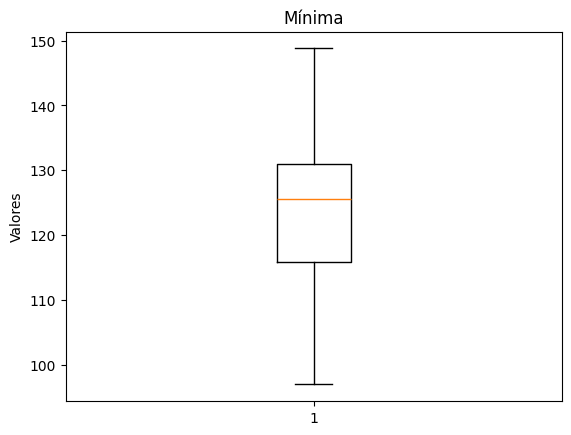

In [ ]:
# Criar o gráfico de boxplot
plt.boxplot(df['Mínima'])
plt.title('Mínima')
plt.ylabel('Valores')
plt.show()

In [ ]:
print(df['Mínima'].min())
print(df['Mínima'].max())

96.997
148.774


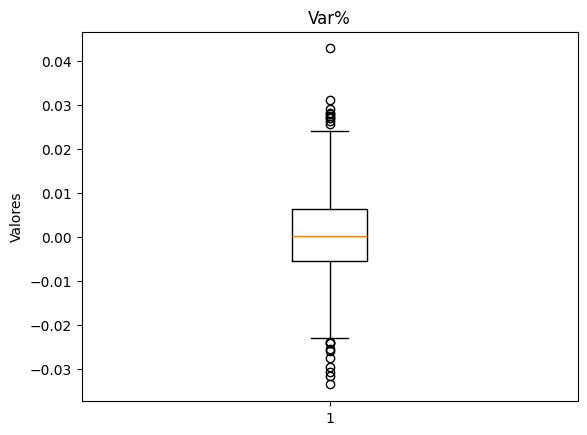

In [ ]:
# Criar o gráfico de boxplot
plt.boxplot(df['Var%'])
plt.title('Var%')
plt.ylabel('Valores')
plt.show()

In [ ]:
print(df['Var%'].min())
print(df['Var%'].max())

-0.0335
0.0429


Conclusão (Responder):
- As escalas são diferentes? R: Principalmente em Vol. os valores variam significativamente. Além disso a escala dessa coluna em relação as demais é bem diferente....
- Alguma categoria precisa de transformação?
- Quais features precisam ser criadas/alteradas ?
  - R: Criar:
    - Tendencia
    - Var. Diária
    - Médias móveis (geralmente usado em análise de graficos de candle para uma ação qualquer na bolsa, cryptos e outros ativos financeiros - definir quantas e quais intervalos)

### Engenharia de Features: Tendencia, Previsão, Médias Móveis, Indicadores Técnicos (RSI, MACD, MACD Siginal, Bandas de Bollinger) e Features de Tempo ...

In [ ]:
# 1. Criando a coluna tendência
df['Tendencia'] = np.select(
    [df['Var%'] > 0, df['Var%'] < 0],
    ['Alta', 'Baixa'],
    default='Estável' # Assuming 0 can be 'Estável' or handle as needed
)
# 2. Criando a coluna Target e da tendência do dia anterior
df['Target_Tendencia_Amanha'] = df['Tendencia'].shift(-1)
df['Tendencia_Dia_Anterior'] = df['Tendencia'].shift(1)

# 3. Criando features de Amplitude diária e Variação
df['Amplitude_Dia'] = df['Máxima'] - df['Mínima']
df['Variacao_Abertura_Fechamento'] = df['Último'] - df['Abertura']

# 4. Criando médias móveis
df['Media_Movel_5_dias'] = df['Último'].rolling(5).mean()
df['Media_Movel_20_dias'] = df['Último'].rolling(20).mean()
df['Media_Movel_50_dias'] = df['Último'].rolling(50).mean()

# 5. Criando o Índice de Força Relativa (RSI)
df['RSI'] = ta.momentum.RSIIndicator(close=df['Último'], window=14).rsi()

# 6. Criando o MACD (Moving Average Convergence Divergence)
macd = ta.trend.MACD(close=df['Último'])
df['MACD'] = macd.macd()
df['MACD_Signal'] = macd.macd_signal()

# 7. Criando Bandas de Bollinger
bollinger = ta.volatility.BollingerBands(close=df['Último'], window=20, window_dev=2)
df['BB_High'] = bollinger.bollinger_hband()
df['BB_Low'] = bollinger.bollinger_lband()
df['BB_Middle'] = bollinger.bollinger_mavg()

# 8. Criando o Average True Range (ATR)
df['ATR'] = ta.volatility.AverageTrueRange(high=df['Máxima'], low=df['Mínima'], close=df['Último'], window=14).average_true_range()

# 9. Criando Differença Normalizada e Preço em Relação a Média Móvel
df['Diff_Normalizada_MM20'] = (df['Último'] - df['Media_Movel_20_dias']) / df['Media_Movel_20_dias']
df['Variacao_Pct_Volume'] = df['Vol.'].pct_change()

# 10. Criando features de tempo
df['Dia_da_Semana'] = df['Data'].dt.dayofweek
df['Mes'] = df['Data'].dt.month
df['Ano'] = df['Data'].dt.year

# 11. Criando lagged features

# Lag de 1 dia
df['Ultimo_Fechamento_lag_1_dia'] = df['Último'].shift(1)
df['Variacao_Pct_lag_1_dia'] = df['Var%'].shift(1)
df['Volume_lag_1_dia'] = df['Vol.'].shift(1)
df['Amplitude_Dia_lag_1_dia'] = df['Amplitude_Dia'].shift(1)
df['Variacao_Abertura_Fechamento_lag_1_dia'] = df['Variacao_Abertura_Fechamento'].shift(1)

# Lag de 2 dias
df['Ultimo_Fechamento_lag_2_dias'] = df['Último'].shift(2)
df['Variacao_Pct_lag_2_dias'] = df['Var%'].shift(2)
df['Volume_lag_2_dias'] = df['Vol.'].shift(2)
df['Amplitude_Dia_lag_2_dias'] = df['Amplitude_Dia'].shift(2)
df['Variacao_Abertura_Fechamento_lag_2_dias'] = df['Variacao_Abertura_Fechamento'].shift(2)

# Lag de 3 dias
df['Ultimo_Fechamento_lag_3_dias'] = df['Último'].shift(3)
df['Variacao_Pct_lag_3_dias'] = df['Var%'].shift(3)
df['Volume_lag_3_dias'] = df['Vol.'].shift(3)
df['Amplitude_Dia_lag_3_dias'] = df['Amplitude_Dia'].shift(3)
df['Variacao_Abertura_Fechamento_lag_3_dias'] = df['Variacao_Abertura_Fechamento'].shift(3)

# Lag de 5 dias
df['Ultimo_Fechamento_lag_5_dias'] = df['Último'].shift(5)
df['Variacao_Pct_lag_5_dias'] = df['Var%'].shift(5)
df['Volume_lag_5_dias'] = df['Vol.'].shift(5)
df['Amplitude_Dia_lag_5_dias'] = df['Amplitude_Dia'].shift(5)
df['Variacao_Abertura_Fechamento_lag_5_dias'] = df['Variacao_Abertura_Fechamento'].shift(5)

# 12. Removendo linhas com valores NaN que surgiram das operações acima (médias móveis, indicadores e lags)
df.dropna(inplace=True)

# Exibindo as primeiras linhas do DataFrame com as novas features
print("DataFrame com as features criadas e valores NaN removidos:")
display(df.head())

# Exibindo informações e o formato final do DataFrame
print("\nInformações do DataFrame:")
df.info()

print("\nFormato do DataFrame (linhas, colunas):")
print(df.shape)


DataFrame com as features criadas e valores NaN removidos:


,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,Vol._sqrt,Tendencia,Target_Tendencia_Amanha,...,Ultimo_Fechamento_lag_3_dias,Variacao_Pct_lag_3_dias,Volume_lag_3_dias,Amplitude_Dia_lag_3_dias,Variacao_Abertura_Fechamento_lag_3_dias,Ultimo_Fechamento_lag_5_dias,Variacao_Pct_lag_5_dias,Volume_lag_5_dias,Amplitude_Dia_lag_5_dias,Variacao_Abertura_Fechamento_lag_5_dias
702,2023-01-11,112.517,110.816,112.552,110.752,14460000.0,0.0153,3802.630668,Alta,Baixa,...,108.964,0.0123,12630000.0,1.791,1.322,105.334,0.0112,14450000.0,1.712,1.167
701,2023-01-12,111.850,112.516,113.129,110.982,19840000.0,-0.0059,4454.211490,Baixa,Baixa,...,109.130,0.0015,12050000.0,1.804,0.166,107.641,0.0219,15510000.0,2.410,2.305
700,2023-01-13,110.916,111.843,111.847,110.428,15940000.0,-0.0084,3992.492956,Baixa,Baixa,...,110.817,0.0155,13700000.0,2.715,1.688,108.964,0.0123,12630000.0,1.791,1.322
699,2023-01-16,109.213,110.908,110.908,108.753,12510000.0,-0.0154,3536.947837,Baixa,Alta,...,112.517,0.0153,14460000.0,1.800,1.701,109.130,0.0015,12050000.0,1.804,0.166
698,2023-01-17,111.439,109.214,111.577,109.214,14360000.0,0.0204,3789.459064,Alta,Alta,...,111.850,-0.0059,19840000.0,2.147,-0.666,110.817,0.0155,13700000.0,2.715,1.688



Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 702 entries, 702 to 1
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Data                                     702 non-null    datetime64[ns]
 1   Último                                   702 non-null    float64       
 2   Abertura                                 702 non-null    float64       
 3   Máxima                                   702 non-null    float64       
 4   Mínima                                   702 non-null    float64       
 5   Vol.                                     702 non-null    float64       
 6   Var%                                     702 non-null    float64       
 7   Vol._sqrt                                702 non-null    float64       
 8   Tendencia                                702 non-null    object        
 9   Target_Tendencia_Aman

In [1]:
df.to_csv("FinalDataset.csv")

NameError: name 'df' is not defined